<a href="https://colab.research.google.com/github/curlywallabee/Jantungku/blob/main/IEEE_EMBS_ML_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [787]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

Variable to be predicted

1. Age : Age of the patient

2. Sex : Sex of the patient

3. exang: exercise induced angina (1 = yes; 0 = no)

4. ca: number of major vessels (0-3)

5. cp : Chest Pain type chest pain type

  *   Value 1: typical angina
  *   Value 2: atypical angina
  *   Value 3: non-anginal pain
  *   Value 4: asymptomatic

6. trestbps : resting blood pressure (in mm Hg)

7. chol : cholestoral in mg/dl fetched via BMI sensor

8. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

9. restecg : resting electrocardiographic results

  * Value 0: normal
  * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria.

10. thalach : maximum heart rate achieved.

11. target : 0= less chance of heart attack 1= more chance of heart attack.

# Data Collection and Processing

In [788]:
heart_data = pd.read_csv('/content/drive/MyDrive/1 File IEEE/heart_input.csv')

In [789]:
# first 5 row of the data
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [790]:
#last 5 row of the data
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [791]:
heart_data.info()
#non-null values it means they are don't have any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [792]:
#numbers of rows and columns
heart_data.shape

(1025, 14)

In [793]:
#print descriptive stats of this data
heart_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


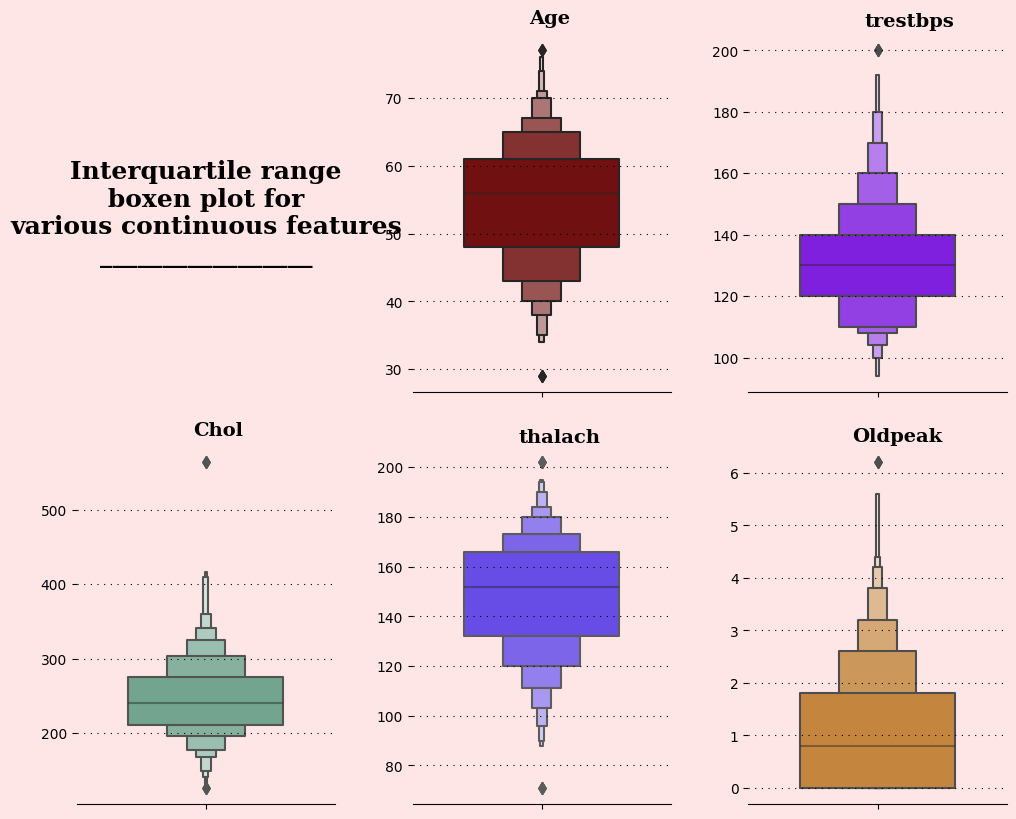

In [794]:
fig = plt.figure(figsize=(12,10))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Interquartile range\n boxen plot for \nvarious continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=heart_data['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps
ax2.text(-0.05, 208, 'trestbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=heart_data['trestbps'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol
ax3.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=heart_data['chol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh
ax4.text(-0.09, 210, 'thalach', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=heart_data['thalach'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=heart_data['oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

In [795]:
#checking distribution of target variable
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

1 = Defective Heart
0 = not defective heart

# Splitting the features and target

In [796]:
x = heart_data.drop(columns='target', axis = 1)
y = heart_data['target']

In [797]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [798]:
print(x)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

Splitting data into trainging and test data

In [799]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, stratify=y, random_state=42)


In [800]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)
print("The shape of x_train is      ", x_train.shape)
print("The shape of x_test is       ",x_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of x_train is       (820, 13)
The shape of x_test is        (205, 13)
The shape of y_train is       (820,)
The shape of y_test is        (205,)


In [801]:
y_pred = model.predict(x_test)

In [802]:
print (x.shape, x_train.shape, x_test.shape)

(1025, 13) (820, 13) (205, 13)


# MODEL TRAINING

LOGISTIC REGRESSION

In [803]:
model = LogisticRegression()

In [804]:
#i'm gonna train the logistic regression model with training data
model.fit(x_train.values, y_train.values)

LogisticRegression()

Model Evaluation

In [805]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

# Confusion Matrix

In [806]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])


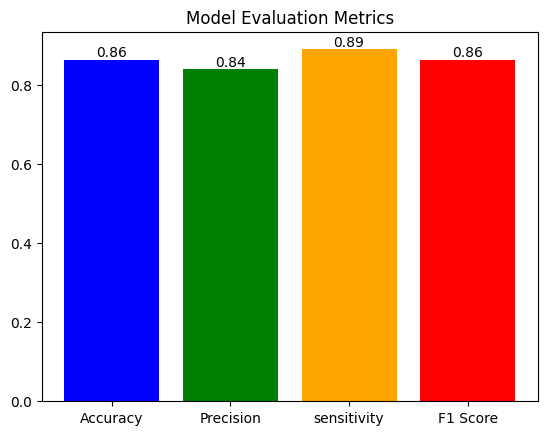

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           88           17
Actual 1           11           89


In [807]:
# Visualisasi metrik
labels = ['Accuracy', 'Precision', 'sensitivity', 'F1 Score']
values = [accuracy, precision, recall, f1]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['blue', 'green', 'orange', 'red'])

# Menambahkan nilai di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Model Evaluation Metrics')
plt.show()

# Tampilkan tabel matriks kebingungan
print("Confusion Matrix:")
print(conf_df)


Accuracy Score

In [808]:
#accuracy on training data
x_train_prediction = model.predict(x_train.values)
training_data_accuracy = accuracy_score(x_train_prediction, y_train.values)

In [809]:
print('Accuracy on Training Data : ', training_data_accuracy)


Accuracy on Training Data :  0.8597560975609756


In [810]:
#accuracy on test data
x_test_prediction = model.predict(x_test.values)
test_data_accuracy = accuracy_score(x_test_prediction, y_test.values)

In [811]:
print('Accuracy on Test Data : ', test_data_accuracy)

Accuracy on Test Data :  0.8536585365853658


LIST OF INPUT DATA

In [812]:
#ADDING FILE FOR INPUT DATA
#YOU CAN CHECK THIS MODEL FROM THE FOLLOWING DATASET
input_data = pd.read_csv('/content/drive/MyDrive/1 File IEEE/heart.csv')
input_data.tail(20)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0


Predictive System

In [813]:
input_data = (58,1,2,140,211,1,0,165,0,0.0,2,0,2)

#change the input data to np array
input_data_as_numpy= np.asarray(input_data)

#reshape the numpy array as i predicting for only one instance
input_data_reshaped = input_data_as_numpy.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction [0]== 0):
  print ('This person does not have a heart disease')
else:
  print ('This person has a heart disease')

#I am inputing this data from another dataset that represents that this person has a heart disease,
#and then this model has succeed to forcast this person with these variables

[1]
This person has a heart disease
